# Presentation of HMM Estimation

#### setup

In [45]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy as sp
import numpy.random as npr
import scipy.stats as sps

from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

import numpy.linalg as la

print sp.__version__

import os
from datetime import datetime

0.18.1


In [9]:
import econohmm.hmm as hmm
import econohmm.emission_models as emm
import econohmm.cystats as cystats

## Sample Data

#### Assumptions for Sample Data

In [10]:
## 5 States
## Transition Matrix

mm = [[.8, .2, 0, 0, 0], 
      [.2, .6, .2, 0,0], 
      [0, .2,.6, .2, 0], 
      [0, 0,.2, .6, .2], 
      [0, 0, 0, .2, .8]]

mm = np.asarray(mm)
mm /= mm.sum(axis=1)[:,np.newaxis]

## Distribution Parameters 
## Emission Model x | z ~ N(m, v)

params0 = np.asarray([[0,.5], 
                      [3,.3],
                      [6,.1], 
                      [9,.1], 
                      [12,.4]])
params0[:,1] *= 10

In [11]:
## 3 States
## Transition Matrix

mm = [[.9, .1, 0], 
      [.1,.8, .1], 
      [0, .1, .9]]

mm = np.asarray(mm)
mm /= mm.sum(axis=1)[:,np.newaxis]

## Real Parameter Values
params0 = np.asarray([[0,1.], [2.5, 1],[5,1]])
params0[:,1] *= .4

### Produce Sample Data Based On Assumptions


A Hidden Markov Model is made up of a switching process and an emissions model. Each is set up as an individual object that is input into the HMM object. The emission model is a container object that holds individual distribution models. 

In [46]:
m0 = hmm.Markov(mm)
e0 = emm.NormalEmission1d(e_params=params0)
h0 = hmm.HMM(m0, e0)

data = h0.sample_path(1000, save=True,out=True)

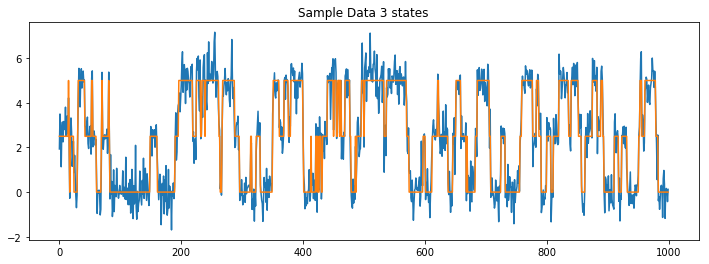

In [47]:
plt.figure( figsize=(12,4));
plt.plot(data);
plt.plot(params0[:,0][h0.states])
plt.title("Sample Data {} states".format(mm.shape[0]));

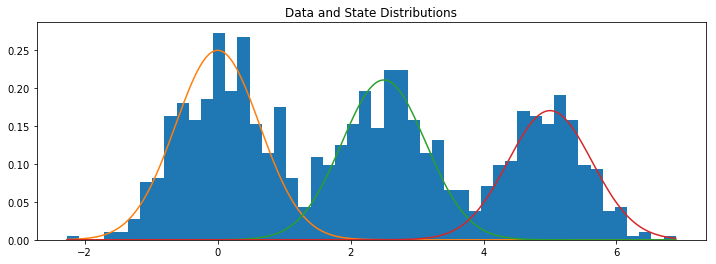

In [14]:
x = np.linspace(data.min(), data.max(), 1000)
plt.figure(figsize=(12,4))
plt.hist(data, 50,normed=True);
for i, cc in enumerate(e0):
    pp = np.count_nonzero(h0.states==i)/data.shape[0]
    plt.plot(x,  pp*sps.norm.pdf(x,cc.mu, cc.sigma**.5))
    
plt.title("Data and State Distributions")

### Estimate Sample Data Using Baum-Welsch Algorithm
#### Note: the BM algo is the HMM equivalent of Expectations Maximization

In [15]:
%%time 
mu1 = array([-2, 4,  8])
cov1 = np.ones(mu1.shape[0])
params1 = np.vstack((mu1, cov1)).T

N=100

m1 = hmm.Markov(mu1.shape[0])
e1 = emm.NormalEmission(params=params1, K=mu1.shape[0], prior='ref')
e1.comp_hist_init(N=N)

h1 = hmm.HMM(m1, e1, data)
h1.bm_fit(N)

for cc in h1.em:
    print cc

NormalInvChi2(mu=0.045918,sigma=0.433462)
NormalInvChi2(mu=2.499219,sigma=0.361831)
NormalInvChi2(mu=4.937362,sigma=0.363160)
CPU times: user 3.02 s, sys: 31.3 ms, total: 3.05 s
Wall time: 3.08 s


#### Parameter Estimates

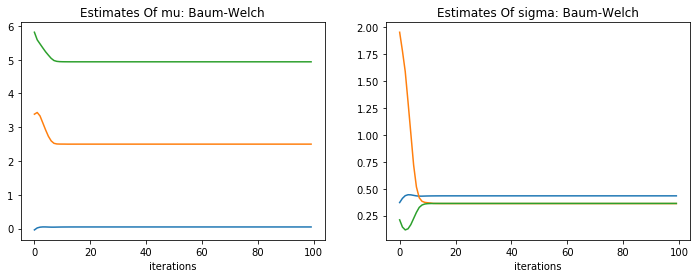

In [16]:
plt.figure(figsize=(12,4))

i=0
for param in ['mu', 'sigma']:
    plt.subplot(121+i)
    i+=1
    plt.title("Estimates Of {}: Baum-Welch".format(param))
    plt.xlabel('iterations')
    for hist in e1.hist:
        plt.plot(hist[param])

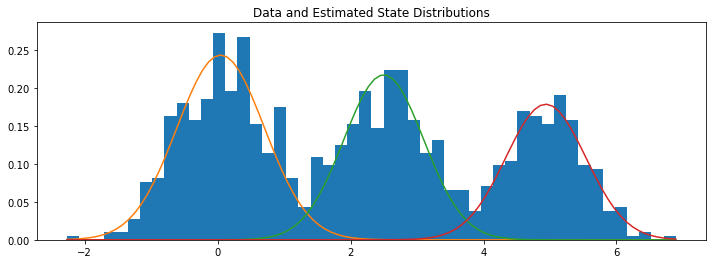

In [17]:
x = np.linspace(data.min(), data.max(), 100)

plt.figure(figsize=(12,4))
plt.hist(data, 50, normed=True);
for i, cc in enumerate(e1):
    pp = np.count_nonzero(h1.g_states==i)/data.shape[0]
    plt.plot(x,  pp*sps.norm.pdf(x,cc.mu, cc.sigma**.5))
    
plt.title("Data and Estimated State Distributions")

#### State Estimates

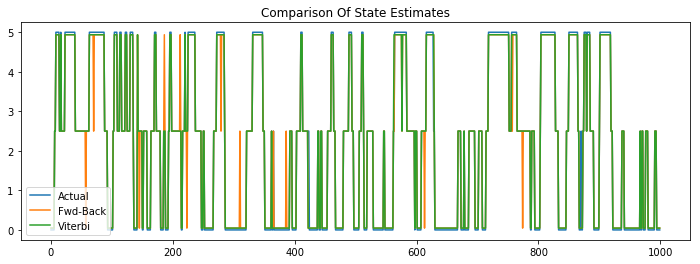

In [18]:
states = ['g', 'v']
state_names = ['Fwd-Back', 'Viterbi']

plt.figure(figsize=(12,4))
plt.plot(params0[:,0][h0.states], label='Actual')
for state , name in zip(states, state_names):
    plt.plot(h1.param_paths('mu', state), label=name)
    
plt.title("Comparison Of State Estimates")
plt.legend(loc='best')

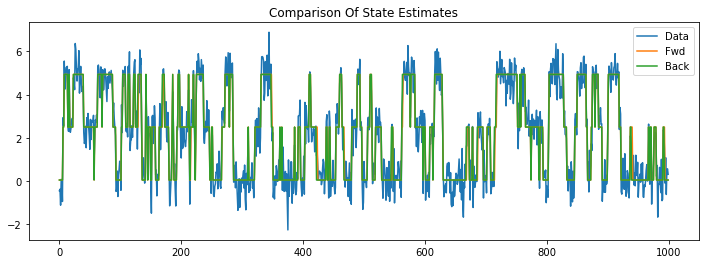

In [19]:
states = ['a', 'b']
state_names = ['Fwd', 'Back']

plt.figure(figsize=(12,4))
plt.plot(data, label='Data')
for state , name in zip(states, state_names):
    plt.plot(h1.param_paths('mu', state), label=name)

plt.title("Comparison Of State Estimates")
plt.legend(loc='best')

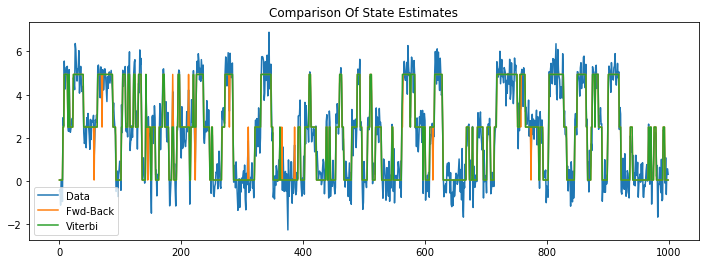

In [20]:
states = ['g', 'v']
state_names = ['Fwd-Back', 'Viterbi']

plt.figure(figsize=(12,4))
plt.plot(data, label='Data')
for state , name in zip(states, state_names):
    plt.plot(h1.param_paths('mu', state), label=name)

plt.title("Comparison Of State Estimates")
plt.legend(loc='best')

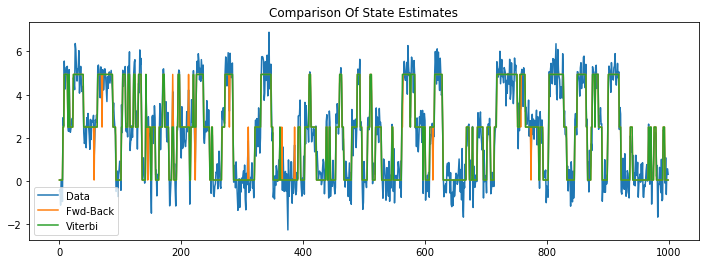

In [21]:
states = ['g', 'v']
state_names = ['Fwd-Back', 'Viterbi']

plt.figure(figsize=(12,4))
plt.plot(data, label='Data')
for state , name in zip(states, state_names):
    plt.plot(h1.param_paths('mu', state), label=name)

plt.title("Comparison Of State Estimates")
plt.legend(loc='best')

### Estimate Sample Data Using Gibbs Sampling

In [23]:
%%time 
N = 100

m4 = hmm.Markov(mu1.shape[0])
e4 = emm.NormalEmission(params=params1, K=mu1.shape[0], prior='ref')
e4.comp_hist_init(N=N)

h4 = hmm.HMM(m4, e4, data)
h4.gibbs(iter_num=N, sample='all')



CPU times: user 2.41 s, sys: 31.1 ms, total: 2.44 s
Wall time: 2.47 s


In [24]:
print "Gibbs Estimates"
print ""
for cc in h4.em:
    print cc
print ""
print "BM Estimates"
print ""
for cc in h1.em:
    print cc

Gibbs Estimates

NormalInvChi2(mu=0.083958,sigma=0.457224)
NormalInvChi2(mu=2.469049,sigma=0.399826)
NormalInvChi2(mu=4.919385,sigma=0.396526)

BM Estimates

NormalInvChi2(mu=0.045918,sigma=0.433462)
NormalInvChi2(mu=2.499219,sigma=0.361831)
NormalInvChi2(mu=4.937362,sigma=0.363160)


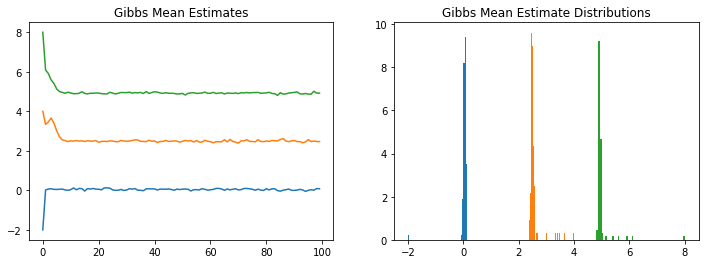

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
for cc in e4:
    plt.plot(cc.hist['mu'])
    plt.title("Gibbs Mean Estimates")
plt.subplot(122)
for cc in e4:
    plt.hist(cc.hist['mu'], 50, normed=True)
    plt.title("Gibbs Mean Estimate Distributions")

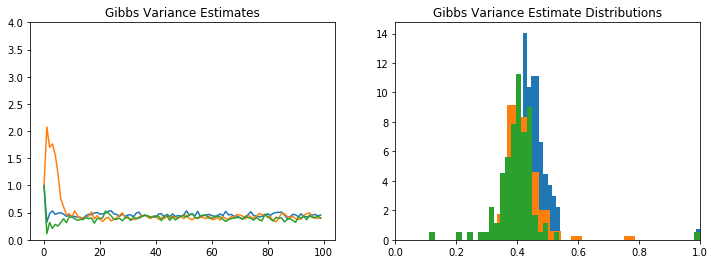

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
for cc in e4:
    plt.plot(cc.hist['sigma'])
    plt.title("Gibbs Variance Estimates")
    plt.ylim(0, 4)
    
plt.subplot(122)
for cc in e4:
    plt.hist(cc.hist['sigma'],50, normed=True)
    plt.title("Gibbs Variance Estimate Distributions")
    plt.xlim(0, 1)

## Application to 10 Year UST Yields: 3 State HMM w/ Gaussian Emissions

In [34]:
rates = DataFrame.from_csv("data/filled_curve_data_01_03_2017.csv")
rate_series = rates["10 YR"].ix["2009":"2013"]
rate = rate_series.values

#### 3 - States

In [35]:
prior = emm.NormalInvChi2(m0=0, s0=1, k0=0, nu0=1)
mu3 = array([1, 3 ,5])
cov3 = np.ones(mu3.shape[0])*10
params3 = np.vstack((mu3, cov3)).T

N=100
m3 = hmm.Markov(mu3.shape[0])
e3 = emm.NormalEmission(params=params3, K=mu3.shape[0], prior=prior)
e3.comp_hist_init(N=N)

h3 = hmm.HMM(m3, e3, rate)

h3.bm_fit(N)
h3.em[:]

[NormalInvChi2(mu=1.890879,sigma=0.043878),
 NormalInvChi2(mu=2.777140,sigma=0.041158),
 NormalInvChi2(mu=3.509434,sigma=0.044488)]

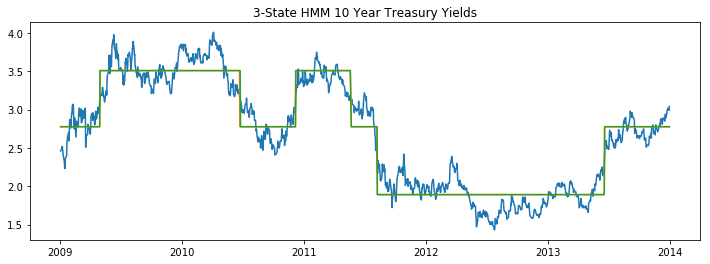

In [37]:
dates = rate_series.index.values
plt.figure(figsize=(12,4))

plt.plot(dates,rate)
plt.plot(dates, h3.param_paths('mu', 'v') )
plt.plot(dates, h3.param_paths('mu', 'g') )

plt.title("3-State HMM 10 Year Treasury Yields")

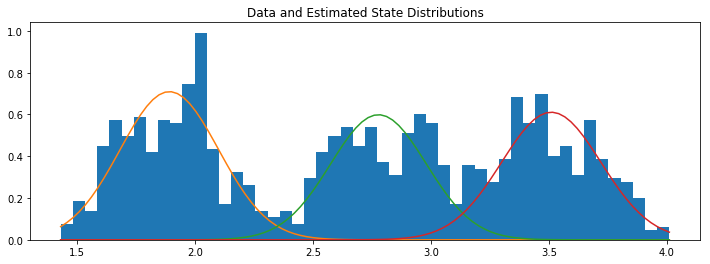

In [38]:
data=rate

x = np.linspace(data.min(), data.max(), 100)

plt.figure(figsize=(12,4))
plt.hist(data, 50, normed=True);
for i, cc in enumerate(e3):
    pp = np.count_nonzero(h3.g_states==i)/data.shape[0]
    plt.plot(x,  pp*sps.norm.pdf(x,cc.mu, cc.sigma**.5))
    
plt.title("Data and Estimated State Distributions")

## Application to Annual Pension Returns: 2 State HMM w/ Gaussian Emissions

In [40]:
hist_returns = pd.read_csv('data/pension_returns.csv', index_col=0)

returns = hist_returns['Annual Returns'].values

In [41]:
prior = emm.NormalInvChi2(m0=0, s0=0, k0=0, nu0=-1)
mu2 = array([-.25, .25])
cov2 = np.ones(mu2.shape[0])*.01
params2 = np.vstack((mu2, cov2)).T

N=1000
m2 = hmm.Markov(mu2.shape[0])
e2 = emm.NormalEmission(params=params2, K=mu2.shape[0], prior=prior)
e2.comp_hist_init(N=N)

h2 = hmm.HMM(m2, e2, returns)

h2.bm_fit(N)
h2.em[:]

[NormalInvChi2(mu=-0.068724,sigma=0.012601),
 NormalInvChi2(mu=0.127545,sigma=0.005795)]

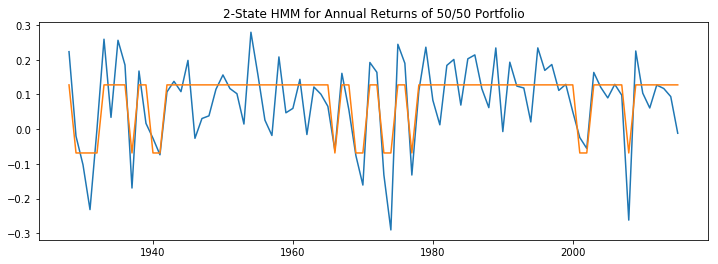

In [44]:
dates = hist_returns.index.values
plt.figure(figsize=(12,4))

plt.plot(dates, returns)
plt.plot(dates, h2.param_paths('mu', 'v'))

plt.title("2-State HMM for Annual Returns of 50/50 Portfolio")